# Cryptocurrency Price Prediction with AUTO TS

#### This program aims to develop a model to predict Bitcoin prices with machine learning using **AUTO TS**.

**Auto_timeseries (AUTO TS)** is a complex model building utility for time series data. Since it automates many Tasks involved in a complex endeavor, it assumes many intelligent defaults. AUTO TS will rapidly build predictive models based on Statsmodels ARIMA, Seasonal ARIMA, Prophet and Scikit-Learn ML. It will automatically select the best model which gives best score specified.   
*source:* https://pypi.org/project/auto-ts/

The data was obtained from **YAHOO! FINANCE** using yfinance API to get historical prices since 2021, January.  
*source:* https://pypi.org/project/yfinance/

><img src="https://user-images.githubusercontent.com/44107852/232332112-330712e3-4ed0-4703-a88e-4fc4edbe68db.png" 
align="left" alt="imdb logo" width="20" height="20">
*This price model prediction can only work in situations where prices changes due to historical variation. Any other price variation reasons, such as government regulations, changes in financial policies, etc do not impact the presented predictions.*


Summary:
** [Colect and process data](#Colect and process data)

### 1. Colect and process data
---

#### Colecting and processing Bitcoin historical prices data from yfinance API:

In [3]:
# Import modules:
import pandas as pd
import numpy as np
from datetime import date,timedelta
import mplfinance as mpf
from auto_ts import auto_timeseries
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Imported auto_timeseries version:0.0.69. Call by using:
model = auto_timeseries(score_type='rmse',
        time_interval='M', non_seasonal_pdq=None, seasonality=False,
        seasonal_period=12, model_type=['best'], verbose=2, dask_xgboost_flag=0)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



In [4]:
# Getting data from file cryptocurrency_get_data.py:
exec(open('cryptocurrency_get_data.py').read())

There are 0 missing values on Data frame
Data frame shape: (836, 6)
Data frame extraction from 2021-01-01 to 2023-04-16
cryptocurrency_get_data successfully run


#### Making a candlestick chart to visualize Bitcoin Prices and the Simple Moving Average since 2021, January:

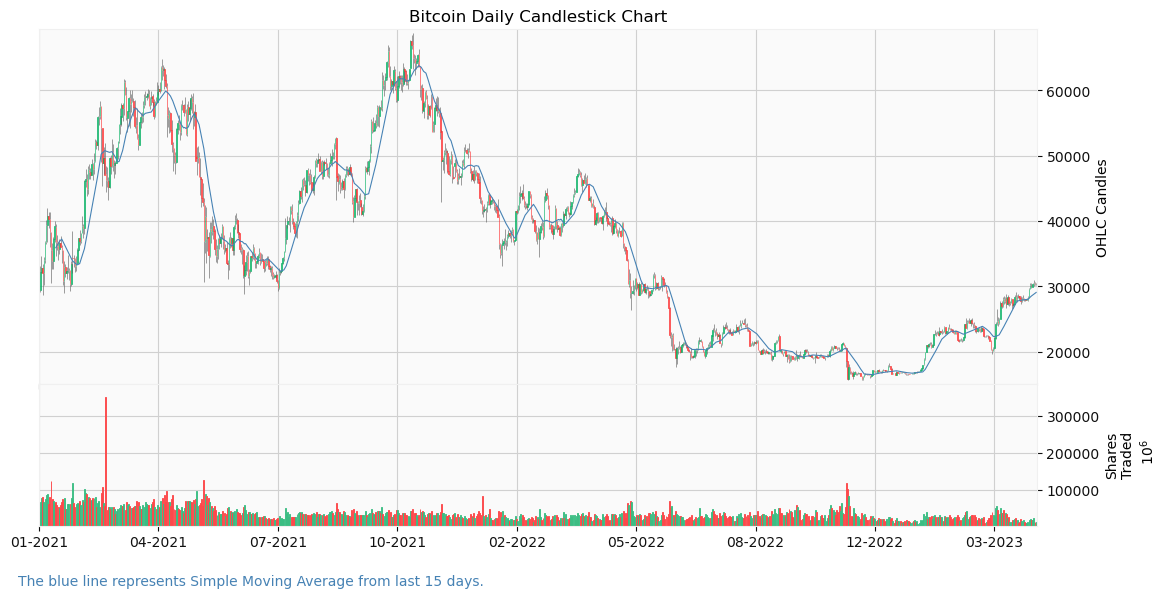

In [100]:
# Selecting and preparing data:
today = date.today().isoformat()
df_cdstk = df_btc.set_index('date')
df_cdstk = df_cdstk.loc['2021-01-01':today,:]

# Creating Candlestick chart:
fig, axes = mpf.plot(df_cdstk, type='candle', mav=(15), volume=True, style='yahoo',
         figratio=(20,10), datetime_format='%m-%Y', mavcolors=["#4682B4"],
         xrotation=0, tight_layout=True, axtitle='Bitcoin Daily Candlestick Chart',
         ylabel='OHLC Candles',
         ylabel_lower='Shares\nTraded', returnfig=True)

fig.text(0.09, 0.005, "The blue line represents Simple Moving Average from last 15 days.", 
         color="#4682B4",fontsize=10);

#### Splitting train and test data:

To build the model were used historical prices of the last 60 days.

The data were splitted into training and testing considering the proportion of 90:10, that is, 90% of the data for training and 10% for testing.

In [101]:
# Setting date 60 days ago:
today = date.today().isoformat()
period = (date.today()-timedelta(days=60)).isoformat()

In [103]:
# Selecting data:
df = df_btc.loc[df_btc.date >= period].reset_index(drop=True)

In [104]:
# Using ratio 90:10 to split test and train data. 
count_lines = len(df.index)
limit = int(count_lines*0.9)

train = df.iloc[:limit]
test = df.iloc[limit-1:]

print("Train length: {}".format(train.shape[0]))
print("Test length: {}".format(test.shape[0]))

Train length: 54
Test length: 8


#### Building a line chart to visualize train-test dataset:

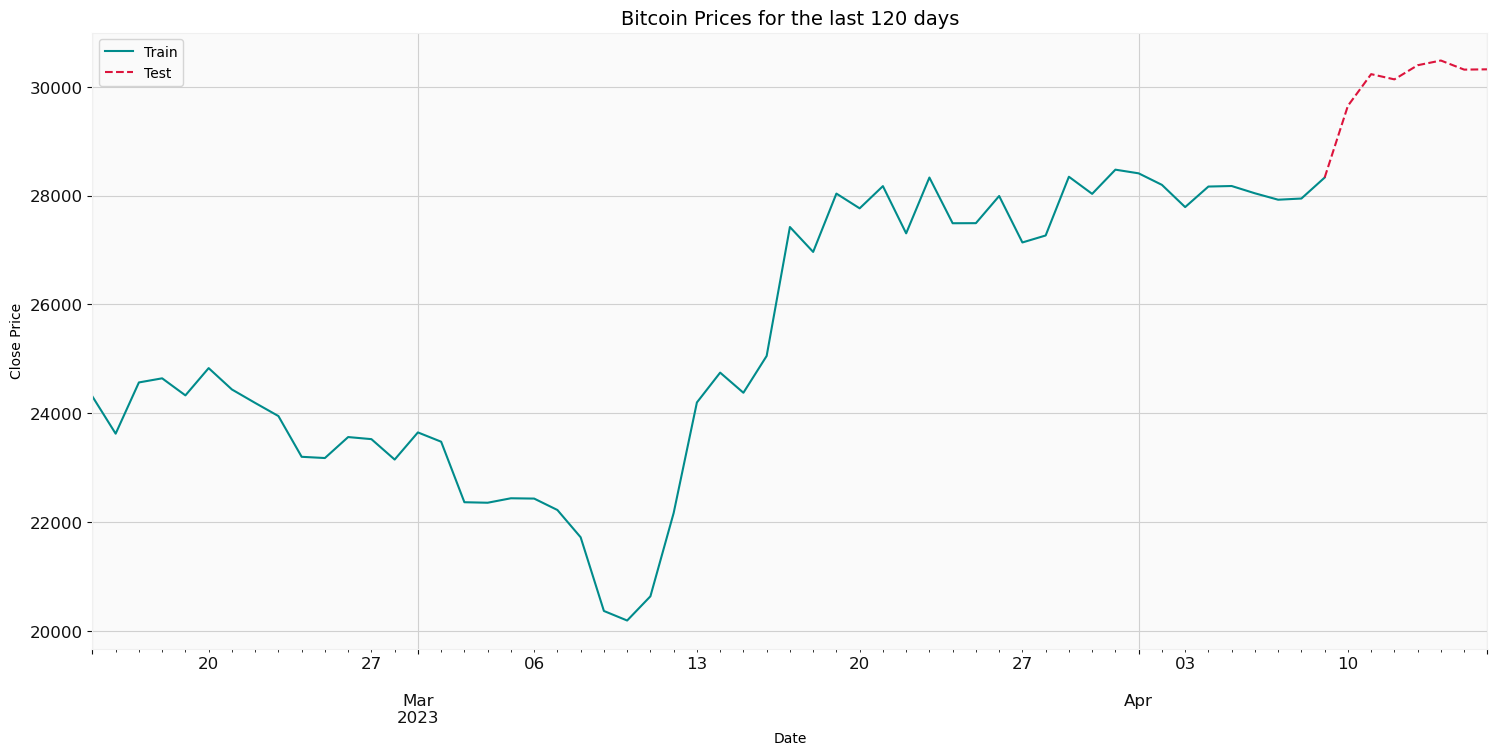

In [106]:
# Preparing data:
train_chart = train.set_index('date')
test_chart = test.set_index('date')

# Building train-test chart:
train_chart.close.plot( figsize=(18,8), fontsize=12, label='Train', color='DarkCyan')
test_chart.close.plot(figsize=(18,8), fontsize=12, label='Test', color='Crimson', ls='--')
plt.legend()
plt.title("Bitcoin Prices for the last 60 days", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Close Price")

plt.show()

### 2. Model Building
---

#### Model Building using AUTO TS:

In [107]:
# Setting model parameters: 
model = auto_timeseries(forecast_period=test.shape[0], score_type='rmse', time_interval='D', model_type='best')

Start of Fit.....
    Target variable given as = close
Start of loading of data.....
    Inputs: ts_column = date, sep = ,, target = ['close']
    Using given input: pandas dataframe...
    date column exists in given train data...
    train data shape = (54, 5)
Alert: Could not detect strf_time_format of date. Provide strf_time format during "setup" for better results.
setting maxlag to a low number = 5

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 5 regression: c autolag: BIC
Data is stationary after one differencing
There is 1 differencing needed in this datasets for VAR model
    No time series plot since verbose = 0. Continuing
Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
kwargs for Prophet model: {'iter': 100}
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Starting Prophet Cross Validation
Max. ite

22:35:49 - cmdstanpy - INFO - Chain [1] start processing
22:35:49 - cmdstanpy - INFO - Chain [1] done processing
22:35:49 - cmdstanpy - INFO - Chain [1] start processing


    RMSE = 3,252.35
    Std Deviation of actuals = 441.37
    Normalized RMSE (as pct of std dev) = 737%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 38 Test Shape: 8


22:35:50 - cmdstanpy - INFO - Chain [1] done processing
22:35:50 - cmdstanpy - INFO - Chain [1] start processing


    RMSE = 3,683.59
    Std Deviation of actuals = 495.58
    Normalized RMSE (as pct of std dev) = 743%
Cross Validation window: 2 completed

Fold Number: 3 --> Train Shape: 46 Test Shape: 8


22:35:50 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 2,682.59
    Std Deviation of actuals = 166.50
    Normalized RMSE (as pct of std dev) = 1611%
Cross Validation window: 3 completed

-------------------------------------------
Model Cross Validation Results:
-------------------------------------------
    MAE (Mean Absolute Error = 3132.08
    MSE (Mean Squared Error = 10447629.48
    MAPE (Mean Absolute Percent Error) = 11%
    RMSE (Root Mean Squared Error) = 3232.2793
    Normalized RMSE (MinMax) = 214%
    Normalized RMSE (as Std Dev of Actuals)= 744%
Time Taken = 1 seconds


22:35:50 - cmdstanpy - INFO - Chain [1] start processing
22:35:51 - cmdstanpy - INFO - Chain [1] done processing


  End of Prophet Fit


Building Auto SARIMAX Model



Running Auto SARIMAX Model...
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=690.504, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=484.744, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=486.278, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=486.252, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=488.371, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=478.049, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=493.331, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=483.058, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=479.558, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=47

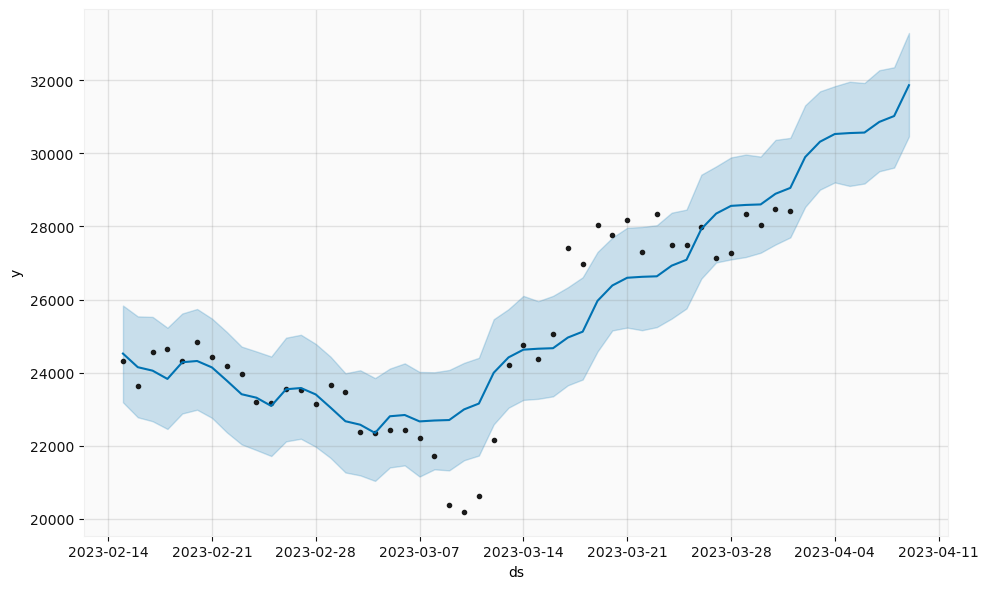

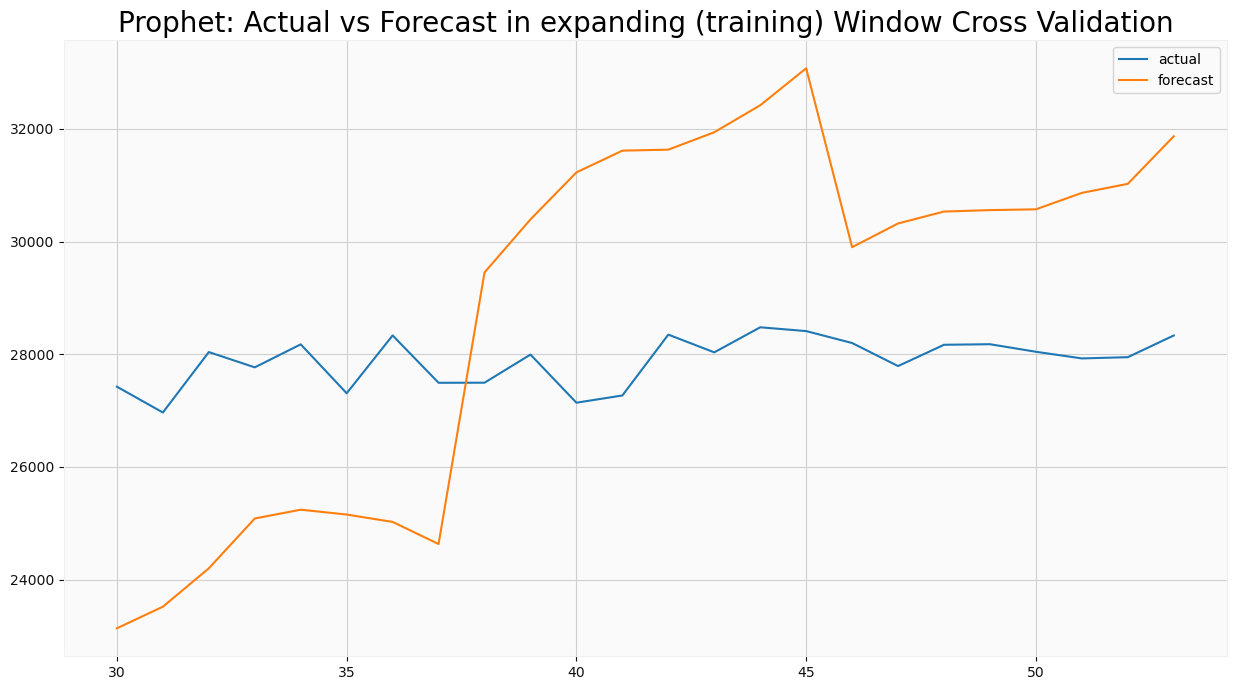

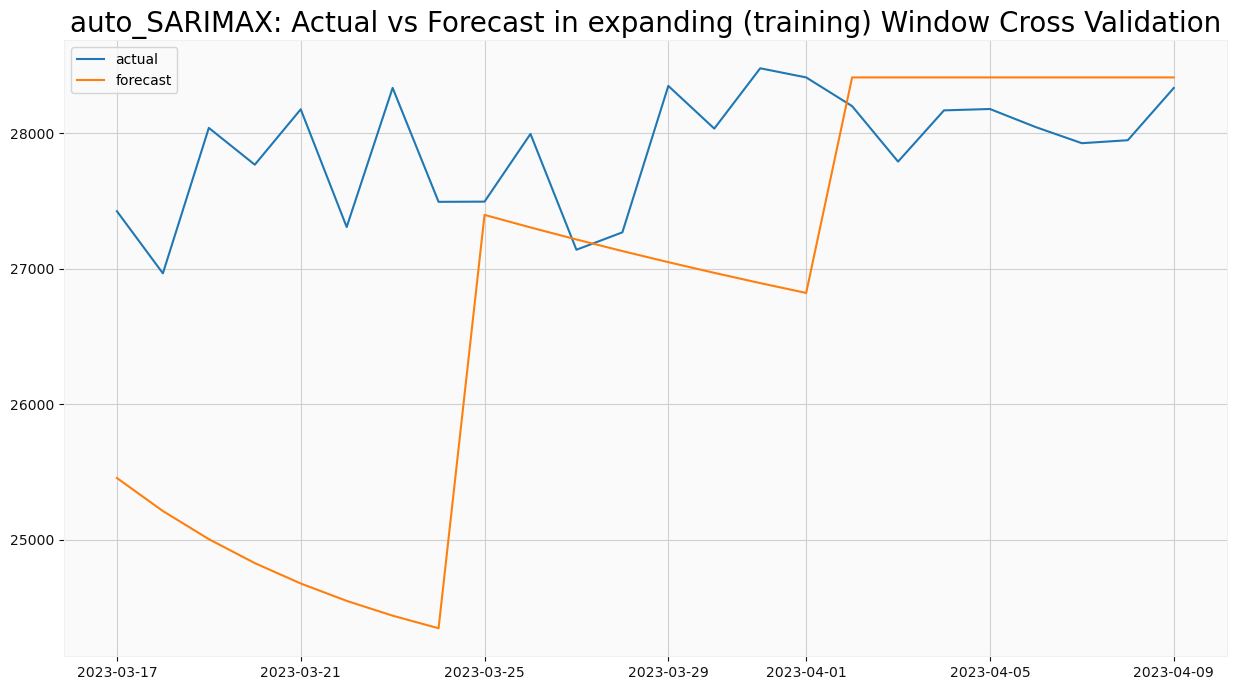

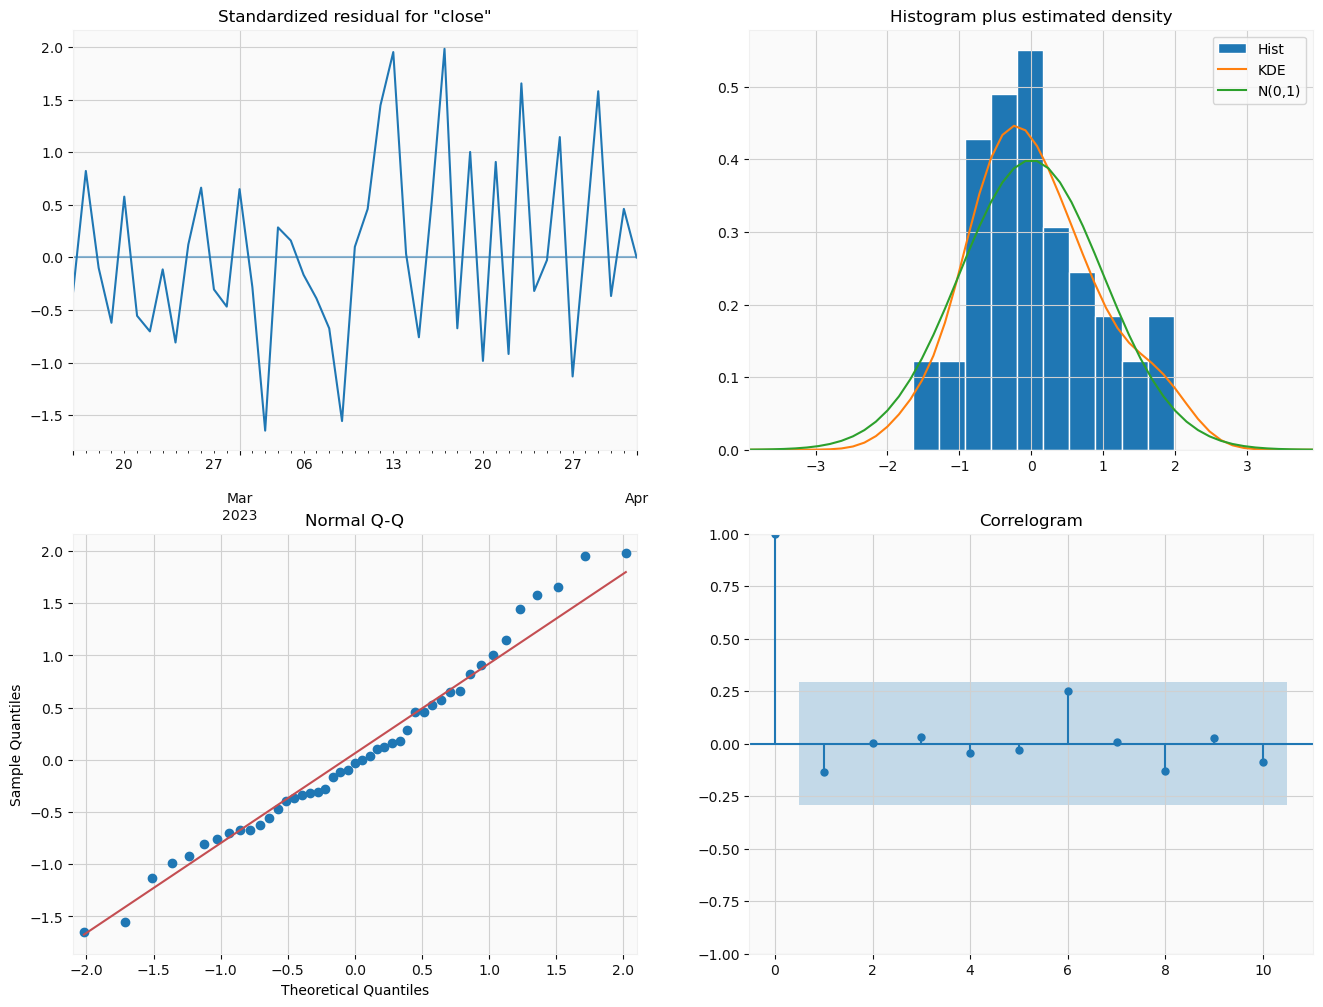

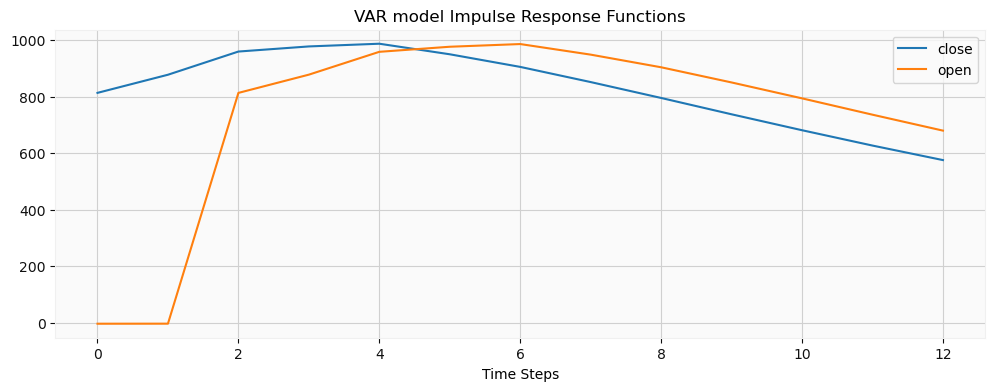

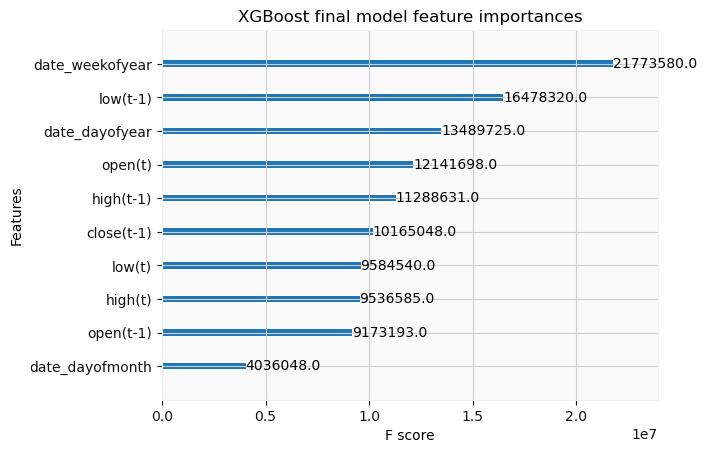

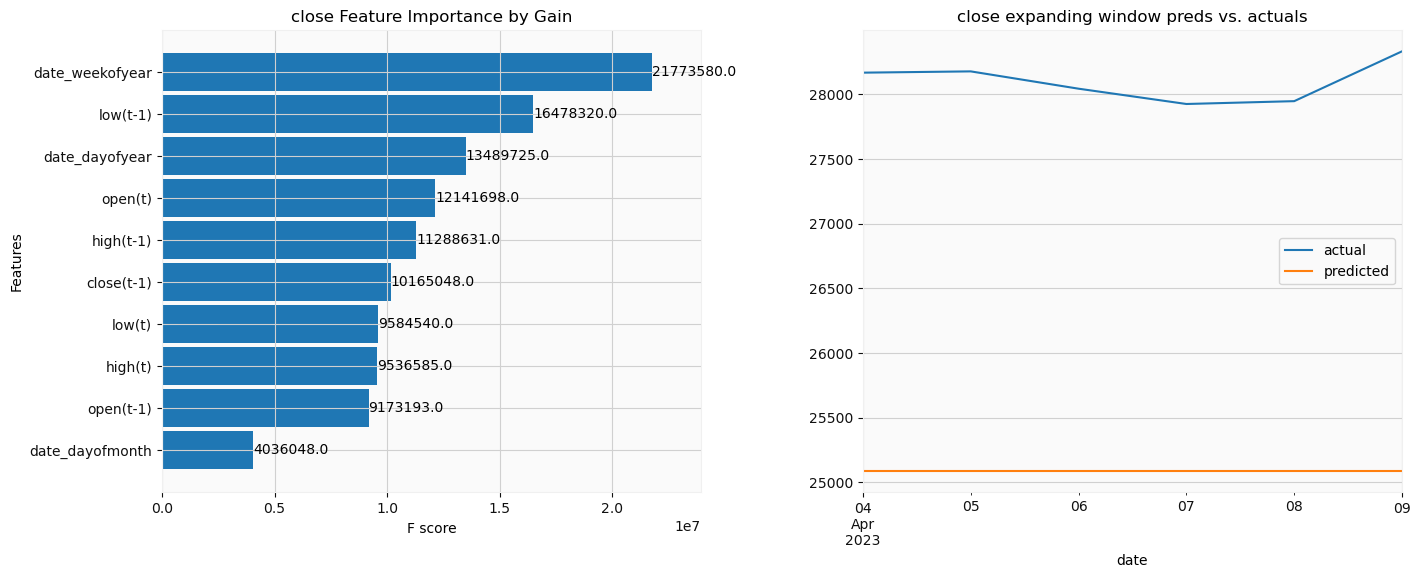

In [108]:
# Fitting model:
model.fit(traindata=train, ts_column='date', target='close', cv=3)

### 3. Model Evaluation
---

#### Let's visualize the model training results:

To evaluate the models, the **Root Mean Square Error (RMSE)** was used.
RMSE calculates the error of a model when making predictions. It indicates the absolute fit of the model to the data – how close the observed data points are to the predicted values.

In [109]:
# Getting model training results:
model.get_leaderboard()

,name,rmse
1,auto_SARIMAX,1450.229688
2,VAR,2568.067090
3,ML,3016.760766
0,Prophet,3206.176038


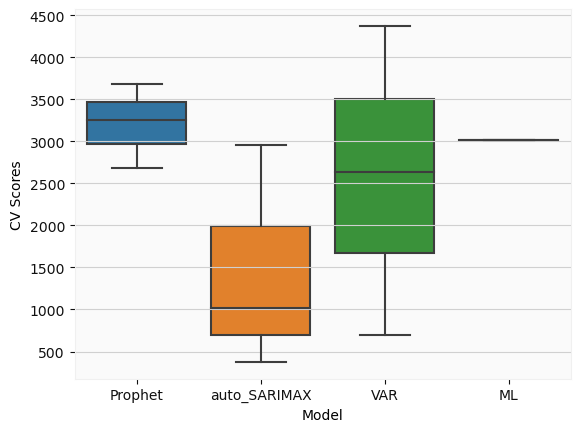

In [112]:
# Showing the best models:
model.plot_cv_scores();

Considering the training data, the best model is **AUTO_SARIMAX** whose RMSE score is 1450.23.   

#### Now, let's see the model performance with test data:

In [121]:
# Showing prediction:
predictions = model.predict(testdata=test, model='best')
print(predictions)

Predicting using test dataframe as input for auto_SARIMAX model
close               yhat     mean_se  mean_ci_lower  mean_ci_upper
2023-04-10  28407.039144  352.100151   27716.935528   29097.142759
2023-04-11  29264.033494  497.944809   28288.079602   30239.987386
2023-04-12  29784.540310  609.855351   28589.245786   30979.834834
2023-04-13  29481.455147  704.200302   28101.247916   30861.662377
2023-04-14  29964.529139  787.319873   28421.410543   31507.647734
2023-04-15  30082.111875  862.465709   28391.710148   31772.513602
2023-04-16  29972.955191  931.569437   28147.112646   31798.797736
2023-04-17  30113.717223  995.889618   28161.809438   32065.625008


In [122]:
# Preparing test data:
y_true = test.close.to_numpy()
y_pred = predictions.yhat.to_numpy()

In [123]:
# Calculating RMSE for the test data:
rmse = mean_squared_error(y_true, y_pred, squared=False)
print("RMSE: {:.2f}".format(rmse))

RMSE: 404.26


Comparing the test data and model predictions for the same period, **404.26** was obtained for the RMSE score.   
This means that the prediction can be wrong by an average of 404.46 (plus or minus).

To see the performance in relative terms, we can calculate the **MAPE** score.   
MAPE (Mean Absolute Percentage Error) is the mean absolute percentage difference between the actual and the predicted value.

In [124]:
# Calculating MAPE for the test data:
mape = mean_absolute_percentage_error(y_true, y_pred)
print("MAPE: {:.2f}%".format(mape*100))

MAPE: 1.23%


#### The model achieved **1.23%** of mean absolute percentage error.

#### Finally, lets see the model result of predictions in a chart:

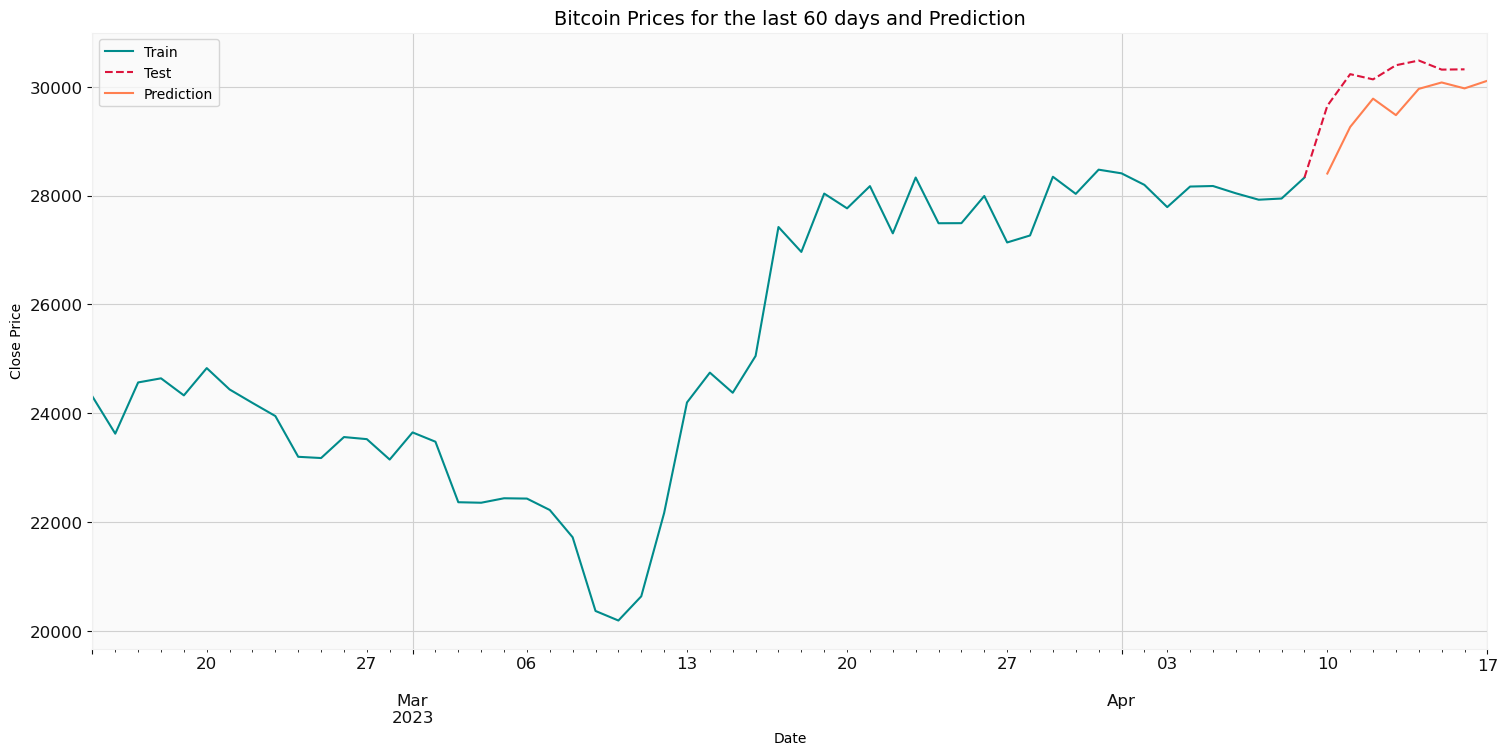

In [126]:
train_graph = train.set_index('date')
test_graph = test.set_index('date')

train_graph.close.plot( figsize=(18,8), fontsize=12, label='Train', color='DarkCyan')
test_graph.close.plot(figsize=(18,8), fontsize=12, label='Test', color='Crimson', ls='--')
predictions.yhat.plot(figsize=(18,8), fontsize=12, label='Prediction', color='Coral')

plt.legend()
plt.title("Bitcoin Prices for the last 60 days and Prediction", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

### 4. Conclusion
---

In this project was presented how to perform time series analysis and forecasting using the Auto Time Series library.
The model obtained seems 
t had the lowest RMSE score and made predictions for six months.
We have learned how to perform time series analysis and forecasting using the . 

Buying and selling result in a change in the price of any cryptocurrency, but buying and selling trends depend on many factors. Using machine learning for cryptocurrency price prediction can only work in situations where prices change due to historical prices that people see before buying and selling their cryptocurrency.